# Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки `pandas`, numpy и `matplotlib`. Загрузите `"Boston House Prices dataset"` из встроенных наборов данных библиотеки `sklearn`. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные `(X_train, y_train)` и тестовые `(X_test, y_test)` с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент `random_state` должен быть равен 42. Масштабируйте данные с помощью `StandardScaler`. Постройте модель `TSNE` на тренировочный данных с параметрами: `n_components=2`, `learning_rate=250`, `random_state=42`. Постройте диаграмму рассеяния на этих данных.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [33]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

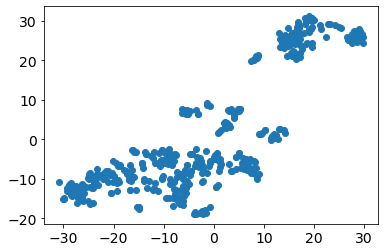

In [38]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

С помощью `KMeans` разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма `X_train`. Параметр `max_iter` должен быть равен 100, `random_state` сделайте равным 42. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью `TSNE`, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения `price` и `CRIM` в разных кластерах.

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

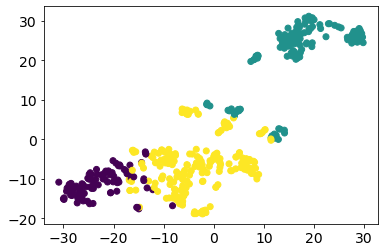

In [40]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [41]:
print('кластер_1 - средняя цена: ', y_train[labels_train == 0].mean())
print('кластер_1 - средний уровень преступности: ', X_train.loc[labels_train == 0, 'CRIM'].mean())

кластер_1 - средняя цена:  27.78837209302326
кластер_1 - средний уровень преступности:  0.07356558139534886


In [42]:
print('кластер_2 - средняя цена: ', y_train[labels_train == 1].mean())
print('кластер_2 - средний уровень преступности: ', X_train.loc[labels_train == 1, 'CRIM'].mean())

кластер_2 - средняя цена:  16.165354330708663
кластер_2 - средний уровень преступности:  10.797028425196853


In [43]:
print('кластер_3 - средняя цена: ', y_train[labels_train == 2].mean())
print('кластер_3 - средний уровень преступности: ', X_train.loc[labels_train == 2, 'CRIM'].mean())

кластер_3 - средняя цена:  24.958115183246072
кластер_3 - средний уровень преступности:  0.42166020942408367


### * Задание 3

Примените модель `KMeans`, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения `price` и `CRIM` в разных кластерах на тестовых данных.

In [44]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [45]:
print('кластер_1 - средняя цена: ', y_test[labels_test == 0].mean())
print('кластер_1 - средний уровень преступности: ', X_test.loc[labels_test == 0, 'CRIM'].mean())

кластер_1 - средняя цена:  33.871428571428574
кластер_1 - средний уровень преступности:  0.08618571428571427


In [46]:
print('кластер_2 - средняя цена: ', y_test[labels_test == 1].mean())
print('кластер_2 - средний уровень преступности: ', X_test.loc[labels_test == 1, 'CRIM'].mean())

кластер_2 - средняя цена:  21.552830188679245
кластер_2 - средний уровень преступности:  0.25200716981132076


In [47]:
print('кластер_3 - средняя цена: ', y_test[labels_test == 2].mean())
print('кластер_3 - средний уровень преступности: ', X_test.loc[labels_test == 2, 'CRIM'].mean())

кластер_3 - средняя цена:  16.43714285714286
кластер_3 - средний уровень преступности:  10.165531142857143
